# GEOS 518: Jupyter Notebook Assignment #1

## Taylor Dudunake
Due: 07/02/18

** In this Jupyter Notebook, I perform basic tasks of importing and viewing time series data. I perform basic statistical analyses to assess stationarity of discharge data of the Middle Fork Boise River near Twin Springs (USGS 13184500) **

## Preliminary Tasks: loading libraries
This cell imports necessary libraries to perform tasks in this Jupyter Notebook

In [1]:
import pandas as pd # Required for data management tasks

import numpy as np # Required for computation tasks useful for this analysis

import matplotlib.pyplot as plt # Required for all things plotting

from pandas.plotting import autocorrelation_plot # Generates an autocorrelation plot

from statsmodels.tsa.stattools import adfuller # Required for ADF Test

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Task 1.1 Load the data into a usable format
These cells import raw discharge data from a csv file. It's important to view and inspect the data to ensure everything is properly formatted. In this case, I recognize I need to reformat the dates.

In [2]:
df = pd.read_csv('MF_Boise_cfs.csv', names=['Y','M','D','Q'], skiprows=1) # import data
qrows = np.concatenate([np.arange(0,10,1),np.arange(-11,-1,1)])
df.iloc[qrows,:] # shows first and last 10 records of dataframe

,Y,M,D,Q
0,2000,10,1,307
1,2000,10,2,320
2,2000,10,3,311
3,2000,10,4,310
4,2000,10,5,309
5,2000,10,6,310
6,2000,10,7,310
7,2000,10,8,308
8,2000,10,9,306
9,2000,10,10,312


In [3]:
df['SerDates'] = pd.to_datetime(df.Y*10000+df.M*100+df.D,format='%Y%m%d') # reformats date

df.iloc[qrows,:] # shows first and last 10 records of modified dataframe

,Y,M,D,Q,SerDates
0,2000,10,1,307,2000-10-01
1,2000,10,2,320,2000-10-02
2,2000,10,3,311,2000-10-03
3,2000,10,4,310,2000-10-04
4,2000,10,5,309,2000-10-05
5,2000,10,6,310,2000-10-06
6,2000,10,7,310,2000-10-07
7,2000,10,8,308,2000-10-08
8,2000,10,9,306,2000-10-09
9,2000,10,10,312,2000-10-10


In [4]:
Q = df['Q'].values # sets discharge data in datafram to a variable
day_num = np.arange(0,np.size(Q),1)

## Task 1.2 Plot time series data
This cell plots the discharge time series data as a function of time. I use the pandas plotting function, specifying 'SerDates' (the serial datas) on the x axis and 'Q'(discharge)
on the y axis. I'm also using the 'figsize' option to increase the size of the plotted image

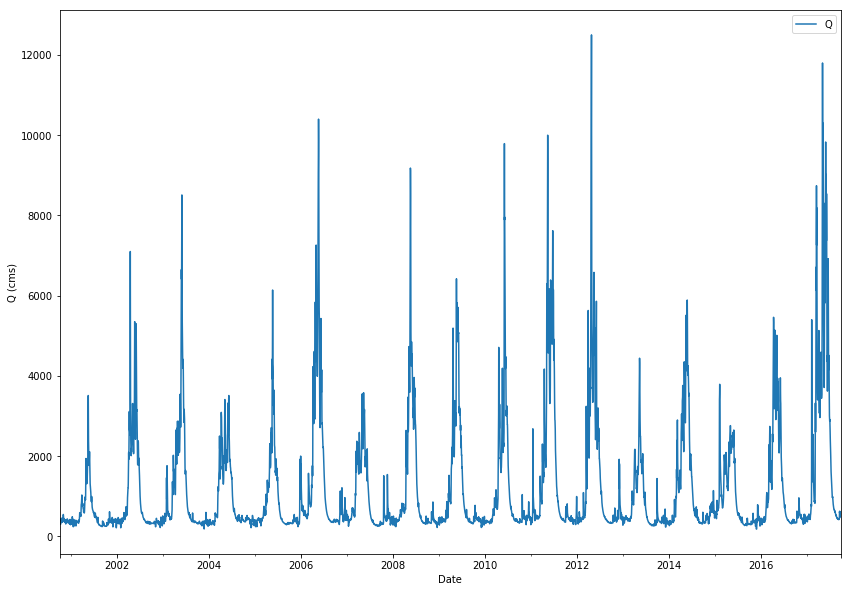

In [5]:
df.plot(x='SerDates', y='Q',figsize=(14,10)) # function used to plot discharge time series data
plt.xlabel('Date')
plt.ylabel('Q (cms)')
plt.show()

## Task 2.1 Generate a histogram of data to understand distribution of data
This cell creates a histogram for which I use to observe any initial thoughts about the stationarity of the time series.

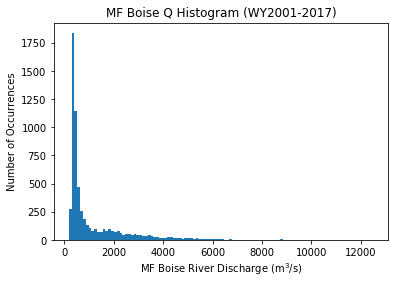

In [6]:
plt.hist(Q, bins='auto') # function used to generate histogram
plt.title('MF Boise Q Histogram (WY2001-2017)')
plt.xlabel('MF Boise River Discharge (m$^3$/s)')
plt.ylabel('Number of Occurrences')
plt.show()

## Task 2.2 Compute key descriptive statistics
 To calculate statistics, I first use the "describe" function to obtain basic descriptive statistics for my time series data. These statistics include mean, standard deviation, minimum, 25%, 50%, and 75% quartile, as well as maximum. This function can be found in the Pandas library. After that, I calculate the same statistics using a different method.

In [7]:
df.Q.describe() # function used to calculate key descriptive statistics

count     6209.000000
mean      1175.351103
std       1433.500744
min        180.000000
25%        374.000000
50%        498.000000
75%       1430.000000
max      12500.000000
Name: Q, dtype: float64

In [8]:
mean = df.Q.mean() # function used to calculate mean
print('The mean in dicharge of the MF Boise River for WY 2001-2017 is:', mean)

var = df.Q.var() # function used to calculate variance
print('The variance in discharge of the MF Boise River for WY 2001-2017 is:', var)

std = df.Q.std() # function used to calculate standard deviation
print('The standard deviation in discharge of the MF Boise River for WY 2001-2017 is:', std)

The mean in dicharge of the MF Boise River for WY 2001-2017 is: 1175.3511032372362
The variance in discharge of the MF Boise River for WY 2001-2017 is: 2054924.3828278019
The standard deviation in discharge of the MF Boise River for WY 2001-2017 is: 1433.5007439230026


## Task 3.1 Compute and report the slope of a regression line 
The following cell generates a least squares polynomial fit of the time series data and reports the linear regression function including the slope. Following that calculation, I plot the data with the linear regression. Worth noting is the slope of the regression line. This is significant because it initially appears the data is not stationary based on the non-zero slope.

The Linear Regression Equation for MF Boise River Discharges, WY 2001-2017 is: y = 0.112816402108 x + 825.168991094


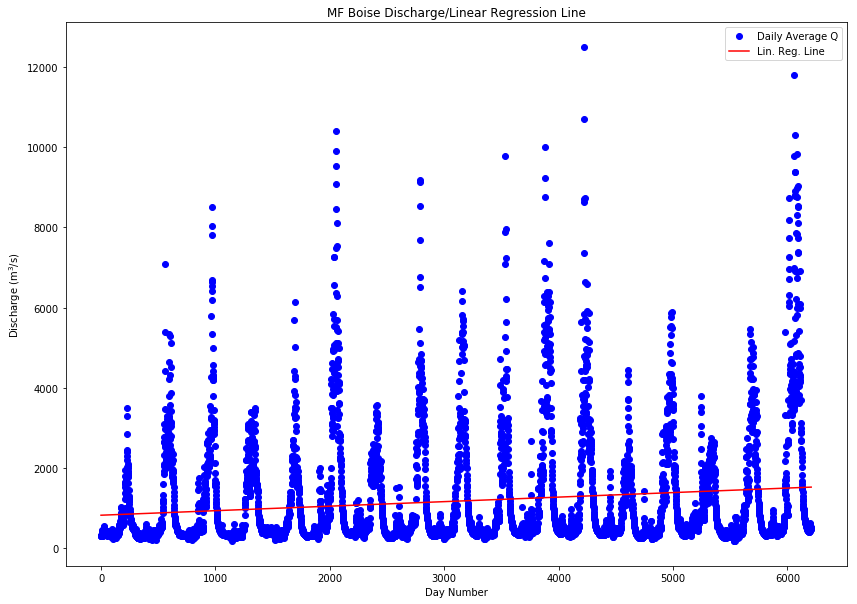

In [9]:
lin_reg = np.polyfit(day_num, Q, 1) # calculates least squares polynomial fit
print('The Linear Regression Equation for MF Boise River Discharges, WY 2001-2017 is: y =', lin_reg[0], 'x +', lin_reg[1])

fit_fn = np.poly1d(lin_reg) # A one dimensional polynomial class

plt.figure(figsize=(14,10)) # Plots data with linear regression
plt.plot(day_num, Q, 'bo', day_num, fit_fn(day_num), '-r')
plt.title('MF Boise Discharge/Linear Regression Line')
plt.xlabel('Day Number')
plt.ylabel('Discharge (m$^3$/s)')
plt.legend(['Daily Average Q','Lin. Reg. Line'])
plt.show()

## Task 3.2 Compute and report the Augmented Dickey-Fuller test
Following the computation of the linear regression, I also perform a Augmented Dickey-Fuller (ADF) Test to assess the stationarity of the data in the following cell.

In [10]:
ADF_result = adfuller(Q) # Use the ADF Test to assess stationarity
print('ADF Statistic: %f' % ADF_result[0])
print('p-value: %f' % ADF_result[1])
print('Critical Values:')
for key, value in ADF_result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.338076
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


## Task 4.1 Compute and plot autocorrelation function (2 methods)
As we learned in class, there are multiple ways to compute and plot the autocorrelation function. In this notebook, I calculate the autocorrelation two ways which can be seen in the following cells.

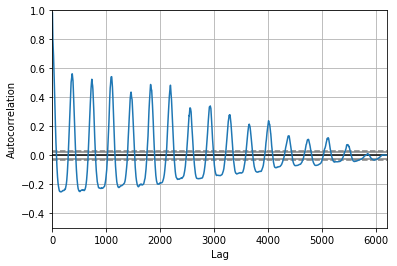

In [11]:
autocorrelation_plot(df['Q']) # this function calculates the autocorrelation coeffecient for lag = 0-6209
plt.ylim(-0.5,1.0)
plt.show()

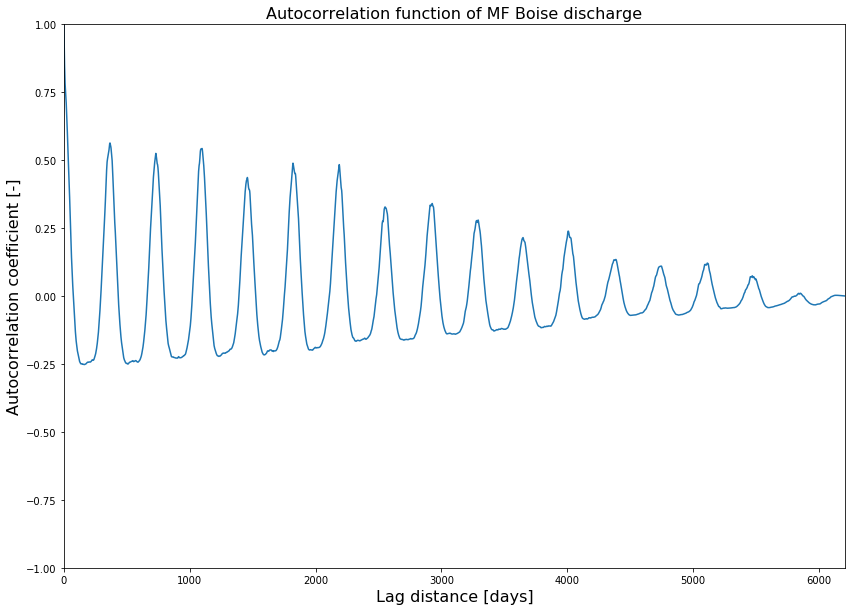

In [12]:
Nk2 = 6209 # Length of data series (days)
K2 = np.arange(0,Nk2,1)

Qp = Q - np.mean(Q) # normalize data

autocovs2 = np.correlate(Qp, Qp, mode='full') # Cross correlation of normalized data
N = autocovs2.size
autocovs2_oneside = autocovs2[N//2:]
autocorrs2_oneside = autocovs2_oneside/autocovs2_oneside[0]

plt.figure(figsize=(14,10)) # plot of autocorrelation function using a second method
plt.plot(K2,autocorrs2_oneside[0:Nk2],'-')
plt.ylim(-1.0,1.0)
plt.xlim(0.0,np.amax(K2.astype(float)))
plt.title('Autocorrelation function of MF Boise discharge',fontsize=16)
plt.xlabel('Lag distance [days]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)
plt.show()

## Task 5 Discussion
Assessing trends of this time series dataset indicate a few important things worth noting. First, the histogram shows a very right skewed distribution. This seems to be the tendency of an unregulated river environemnt with a hydrograph heavily influenced by snowmelt. A majority of the data in the MF Boise River populates the left side of the histogram. Also, by fitting a linear regression to the data, I recognize the slope of the regression line is slightly positive. Environmental factors are likely to be blamed for this trend (i.e. snowpack, rainfall, etc). If the data is not detrended, we lose focuse on how the data fluctuates around the apparent trend. However, I think it's important to recognize this trend and how it's applied to physical concepts of hydrologic data. Since we see an increasing trend in the data, it makes sense that the autocorrelation coefficient pinches off to zero through a lag of 6209 days beacuse flows are generally increasing throughout the time series, an indicator of how flows are behaving more recently. Finally, the ADF test indicates that this data is wide sense stationarity.